# EDA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from IPython.display import display, Image


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read File

In [ ]:
df=pd.read_csv("archive (2).zip")

In [ ]:
df.shape   # shape of data columns,rows

(12222, 17)

In [ ]:
df.head()         #gives first five value in dsataset

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Banner images for web desgin websites,Design,Entry ($),Graphic Design,EUR,60.0,remote,ALL,fixed_price,2023-04-29 18:06:39,We are looking to improve the banner images on...,NaN,2010-11-03,Dublin,Ireland,EUR,PPC Management
1,Make my picture a solid silhouette,"Video, Photo & Image",Entry ($),Image Editing,GBP,20.0,remote,ALL,fixed_price,2023-04-29 17:40:28,Hello \n\nI need a quick designer to make 4 pi...,NaN,2017-02-21,London,United Kingdom,GBP,Office manager
2,Bookkeeper needed,Business,Entry ($),Finance & Accounting,GBP,12.0,remote,ALL,fixed_price,2023-04-29 17:40:06,Hi - I need a bookkeeper to assist with bookke...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
3,Accountant needed,Business,Entry ($),Tax Consulting & Advising,GBP,14.0,remote,ALL,fixed_price,2023-04-29 17:32:01,Hi - I need an accountant to assist me with un...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
4,Guest Post on High DA Website,Digital Marketing,Expert ($$$),SEO,USD,10000.0,remote,ALL,fixed_price,2023-04-29 17:09:36,"Hi, I am currently running a project where I w...",NaN,2016-07-01,Mumbai,India,USD,Guest posts buyer


In [ ]:
df.info()     #Gives information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12222 entries, 0 to 12221
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      12222 non-null  object 
 1   Category Name              12222 non-null  object 
 2   Experience                 12222 non-null  object 
 3   Sub Category Name          12222 non-null  object 
 4   Currency                   12222 non-null  object 
 5   Budget                     12222 non-null  float64
 6   Location                   12222 non-null  object 
 7   Freelancer Preferred From  12222 non-null  object 
 8   Type                       12222 non-null  object 
 9   Date Posted                12222 non-null  object 
 10  Description                12222 non-null  object 
 11  Duration                   1602 non-null   object 
 12  Client Registration Date   12222 non-null  object 
 13  Client City                12222 non-null  obj

# Null Values

In [ ]:
df.isnull().sum()     # find out null values

Title                            0
Category Name                    0
Experience                       0
Sub Category Name                0
Currency                         0
Budget                           0
Location                         0
Freelancer Preferred From        0
Type                             0
Date Posted                      0
Description                      0
Duration                     10620
Client Registration Date         0
Client City                      0
Client Country                   0
Client Currency                  0
Client Job Title              7634
dtype: int64

<Axes: >

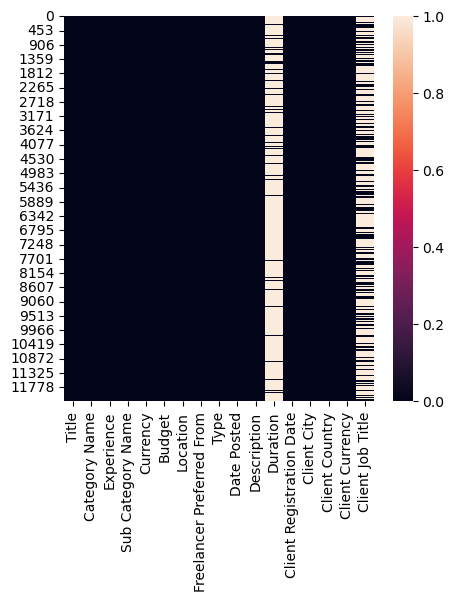

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())

In [ ]:
null_per=df.isnull().sum()/df.shape[0]*100              # give percentage of null values
null_per

Title                         0.000000
Category Name                 0.000000
Experience                    0.000000
Sub Category Name             0.000000
Currency                      0.000000
Budget                        0.000000
Location                      0.000000
Freelancer Preferred From     0.000000
Type                          0.000000
Date Posted                   0.000000
Description                   0.000000
Duration                     86.892489
Client Registration Date      0.000000
Client City                   0.000000
Client Country                0.000000
Client Currency               0.000000
Client Job Title             62.461136
dtype: float64

In [ ]:
df.drop(columns=["Duration", "Client Job Title"], inplace=True)     #remove  columns

In [ ]:
df.shape

(12222, 15)

# Encode Data Using Label Encoding

In [ ]:
encode = ['Title','Category Name','Sub Category Name','Freelancer Preferred From','Description',
                     'Client City','Client Country']

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in encode:
    df[column] = le.fit_transform(df[column])

# One Hot Coding

In [ ]:
one_hot=['Location','Type']

In [ ]:
df = pd.get_dummies(df, columns=one_hot)

In [ ]:

df[['Location_onsite','Location_remote','Type_fixed_price','Type_hourly','Location_remote_country']]=df[['Location_onsite',
                                                                               'Location_remote',
                                                                               'Type_fixed_price',
                                                                               'Type_hourly','Location_remote_country']].astype('int32')

In [ ]:
df['Experience'] = df['Experience'].replace({'Entry ($)':0, 'Intermediate ($$)': 1,'Expert ($$$)': 2})   # repalce value

In [ ]:
df['Experience'].dtypes

dtype('int64')

In [ ]:
def Budget_USD(row):
    if row['Currency'] == 'EUR':
        return row['Budget'] * 1.0956
    elif row['Currency'] == 'GBP':
        return row['Budget'] * 1.28
    else:
        return row['Budget']

In [ ]:
df['Budget'] = df.apply(Budget_USD, axis=1)

In [ ]:
df['Currency'] = df['Currency'].replace({'EUR':'USD', 'GBP': 'USD',' USD':'USD'})
df['Currency'] = df['Currency'].replace({'USD':1})
df['Currency'].nunique()

1

In [ ]:
df['Client Currency'] = df['Client Currency'].replace({'EUR':1.09565, 'GBP': 1.2824,'USD': 1})

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df[['Posted_day', 'Posted_time']] = df['Date Posted'].str.split(' ', 1, expand=True)
df[['Posted_day', 'Posted_time']]

,Posted_day,Posted_time
0,2023-04-29,18:06:39
1,2023-04-29,17:40:28
2,2023-04-29,17:40:06
3,2023-04-29,17:32:01
4,2023-04-29,17:09:36
...,...,...
12217,2023-01-18,19:23:01
12218,2023-01-18,19:18:48
12219,2023-01-18,19:18:48
12220,2023-01-18,19:18:47


In [ ]:
df[['posted_year','Posted_Month','Posted_Date']]=df['Posted_day'].str.split('-', 3, expand=True)

In [ ]:
df[['posted_year','Posted_Month','Posted_Date']]=df[['posted_year','Posted_Month',
                                                     'Posted_Date']].astype('int32')

In [ ]:
df=df.drop(columns=['Date Posted',"Posted_time"])

In [ ]:
df['Client Registration Date']

0        2010-11-03
1        2017-02-21
2        2023-04-09
3        2023-04-09
4        2016-07-01
            ...    
12217    2011-06-06
12218    2022-03-23
12219    2022-03-14
12220    2013-07-21
12221    2020-09-21
Name: Client Registration Date, Length: 12222, dtype: object

In [ ]:
df[['client_year','client_Month','client_Date']]=df['Client Registration Date'].str.split('-', 3, expand=True)

In [ ]:
df[['client_year','client_Month','client_Date']]=df[['client_year','client_Month','client_Date']].astype('int32')

In [ ]:
df=df.drop(columns=['Client Registration Date','client_Date','Posted_Date','Posted_day'])

In [ ]:
df.columns

Index(['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Budget', 'Freelancer Preferred From', 'Description', 'Client City',
       'Client Country', 'Client Currency', 'Location_onsite',
       'Location_remote', 'Location_remote_country', 'Type_fixed_price',
       'Type_hourly', 'posted_year', 'Posted_Month', 'client_year',
       'client_Month'],
      dtype='object')

In [ ]:
columns=df[['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Budget', 'Freelancer Preferred From', 'Description', 'Client City',
       'Client Country', 'Client Currency', 'Location_onsite',
       'Location_remote', 'Location_remote_country', 'Type_fixed_price',
       'Type_hourly', 'posted_year', 'Posted_Month',
        'client_year', 'client_Month']]


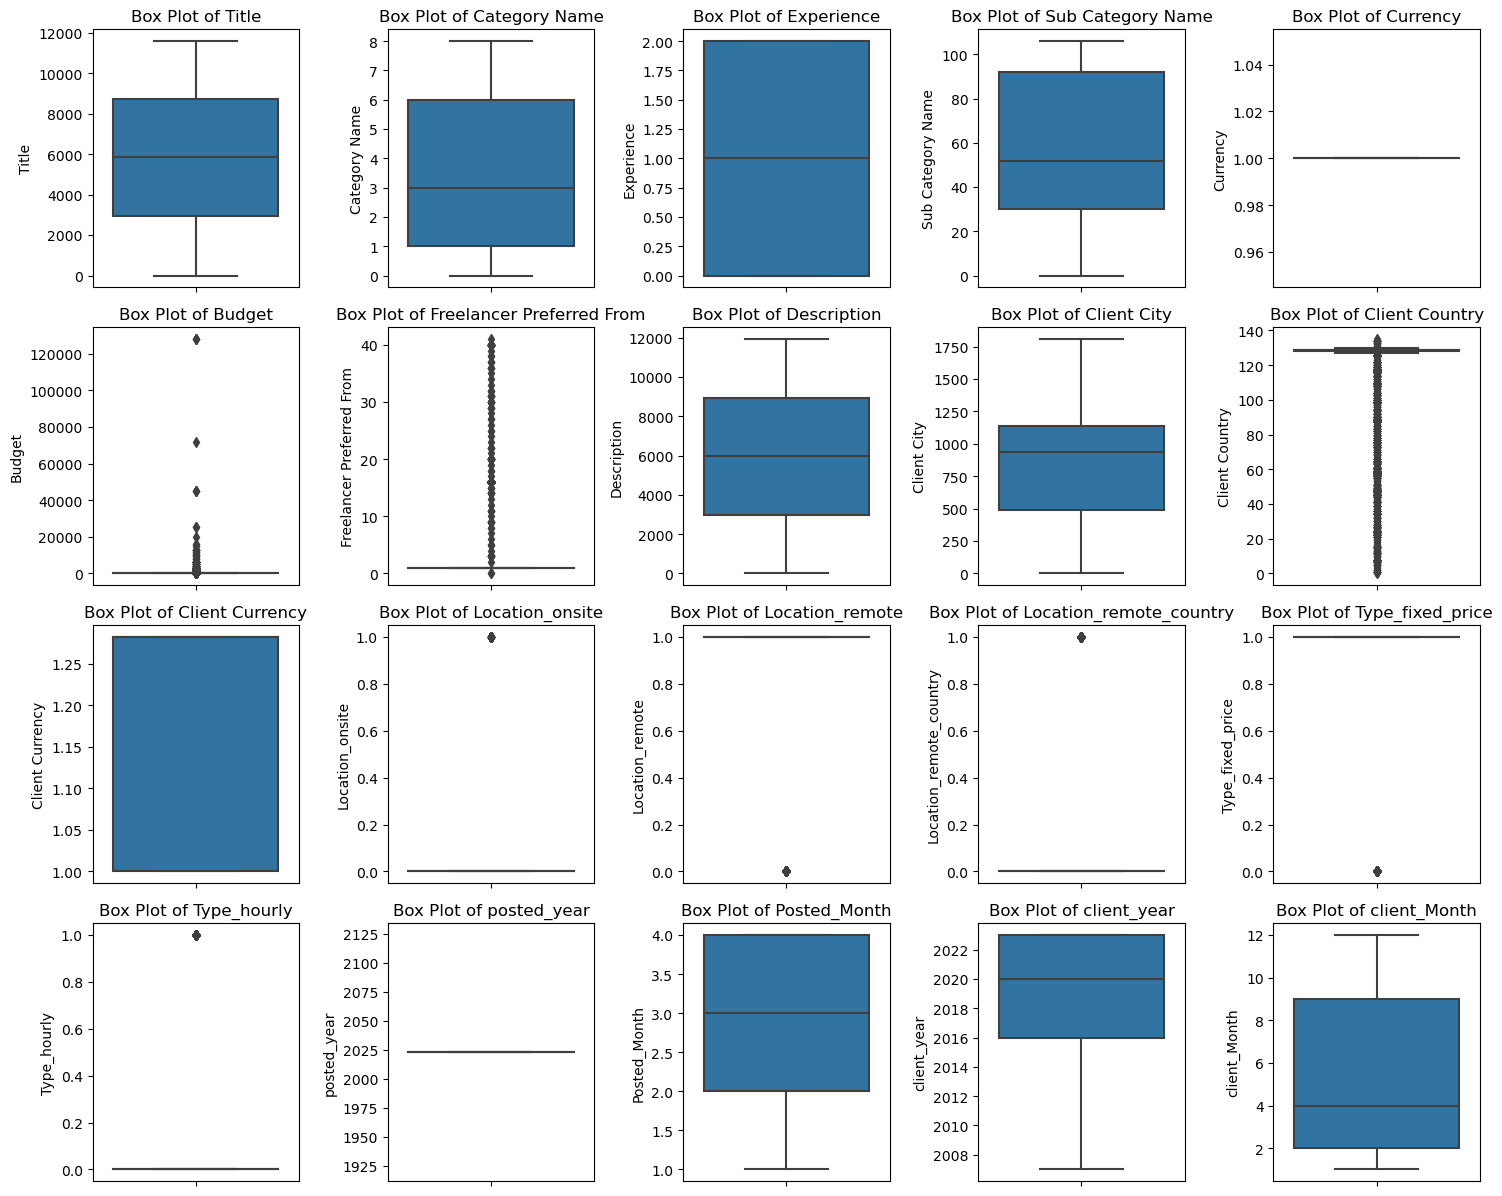

In [ ]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(columns, 1):
    plt.subplot(5, 5, i)  # 5x5 grid, current subplot is i-th

    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(df[col]):
        # Create a box plot for numeric columns
        sns.boxplot(data=df, y=col)
        plt.ylabel(col)
    else:
        # Create a count plot for categorical columns
        sns.countplot(data=df, y=col)
        plt.ylabel('Count')

    # Set title for the subplot
    plt.title(f'Box Plot of {col}' if pd.api.types.is_numeric_dtype(df[col]) else f'Count Plot of {col}')
    plt.xlabel('')

plt.tight_layout()  # Adjust layout
plt.show()  #

In [ ]:
Freelancer_Preferred_From=sorted(df['Freelancer Preferred From'])
Q1,Q3=np.percentile(Freelancer_Preferred_From,[25,75])
iqr=Q3-Q1
lower_limit=Q1-(1.5*iqr)
upper_limit=Q3+(1.5*iqr)
(lower_limit,upper_limit)

(1.0, 1.0)

In [ ]:
df=df[df['Freelancer Preferred From']<=upper_limit]

In [ ]:

df=df[df['Freelancer Preferred From']>=lower_limit]

In [ ]:
df.shape

(11431, 20)

<Axes: >

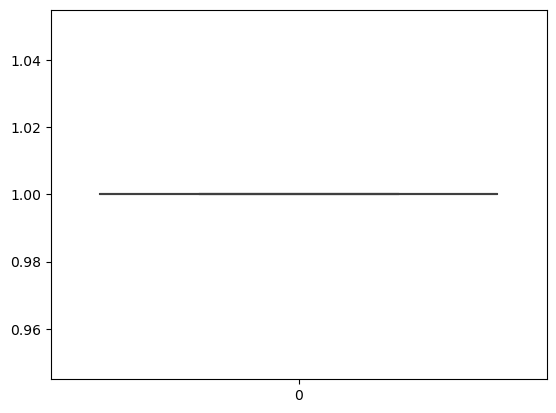

In [ ]:
import seaborn as sns

sns.boxplot(df['Freelancer Preferred From'])

<Axes: >

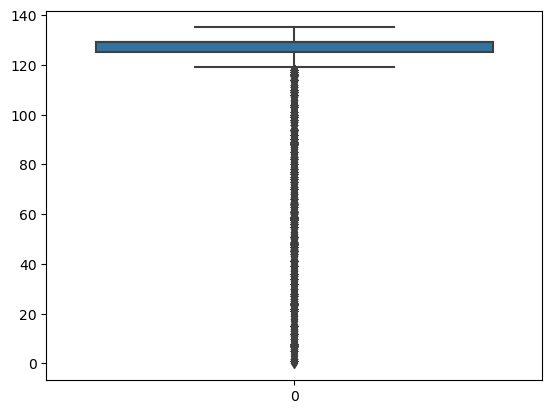

In [ ]:
import seaborn as sns

sns.boxplot(df['Client Country'])

In [ ]:
Client_Country=sorted(df['Client Country'])
Q1,Q3=np.percentile(Client_Country,[25,75])
iqr=Q3-Q1
lower_lim=Q1-(1.5*iqr)
upper_lim=Q3+(1.5*iqr)
print(lower_lim,upper_lim)

119.0 135.0


In [ ]:
df=df[df['Client Country']<upper_lim]

In [ ]:
df.shape

(11430, 20)

<Axes: >

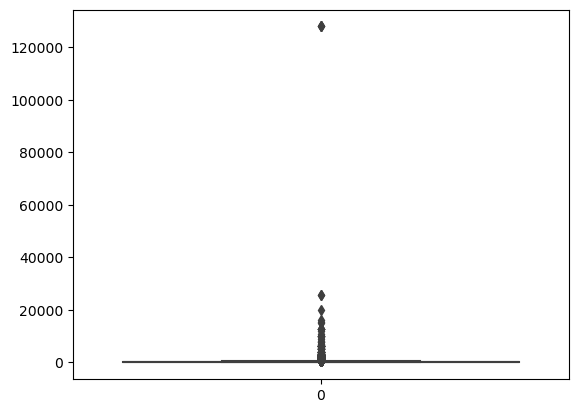

In [ ]:
import seaborn as sns

sns.boxplot(df['Budget'])

In [ ]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Description,Client City,Client Country,Client Currency,Location_onsite,Location_remote,Location_remote_country,Type_fixed_price,Type_hourly,posted_year,Posted_Month,client_year,client_Month
0,969,1,0,42,1,65.736,1,10434,489,61,1.09565,0,1,0,1,0,2023,4,2010,11
1,6377,7,0,45,1,25.600,1,1247,940,129,1.28240,0,1,0,1,0,2023,4,2017,2
2,1108,0,0,37,1,15.360,1,2179,940,129,1.28240,0,1,0,1,0,2023,4,2023,4
3,467,0,0,90,1,17.920,1,2181,940,129,1.28240,0,1,0,1,0,2023,4,2023,4
4,3859,2,2,76,1,10000.000,1,3024,1079,58,1.00000,0,1,0,1,0,2023,4,2016,7


In [ ]:
Budget=sorted(df['Budget'])
Q1,Q3=np.percentile(Budget,[25,75])
iqr=Q3-Q1
lower_lim=Q1-(1.5*iqr)
upper_lim=Q3+(1.5*iqr)
print(lower_lim,upper_lim)



-191.99999999999997 422.4


In [ ]:
df=df[df['Budget']<=upper_lim]

In [ ]:
df.shape

(10366, 20)

<Axes: >

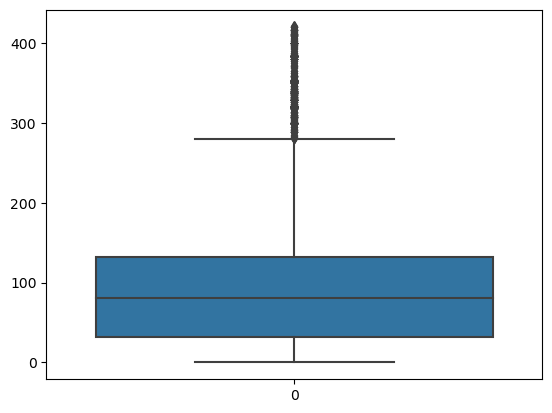

In [ ]:
import seaborn as sns

sns.boxplot(df['Budget'])

In [ ]:
df.columns

Index(['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Budget', 'Freelancer Preferred From', 'Description', 'Client City',
       'Client Country', 'Client Currency', 'Location_onsite',
       'Location_remote', 'Location_remote_country', 'Type_fixed_price',
       'Type_hourly', 'posted_year', 'Posted_Month', 'client_year',
       'client_Month'],
      dtype='object')

In [ ]:
from scipy.stats import skew

In [ ]:

columns=df[['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Budget', 'Freelancer Preferred From', 'Description', 'Client City',
       'Client Country', 'Client Currency', 'Location_onsite',
       'Location_remote', 'Location_remote_country', 'Type_fixed_price',
       'Type_hourly', 'posted_year', 'Posted_Month',
       'client_year', 'client_Month']]


In [ ]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                     int64
Sub Category Name              int32
Currency                       int64
Budget                       float64
Freelancer Preferred From      int32
Description                    int32
Client City                    int32
Client Country                 int32
Client Currency              float64
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
Type_fixed_price               int32
Type_hourly                    int32
posted_year                    int32
Posted_Month                   int32
client_year                    int32
client_Month                   int32
dtype: object

Title
0.002389963996342471
Category Name
0.19490469318582926
Experience
0.21463618168554072
Sub Category Name
-0.0054284645756947384
Currency
nan
Budget
1.3377240368803143
Freelancer Preferred From
nan
Description
0.030265568931130096
Client City
0.03275272988601776
Client Country
-1.9196687121818936
Client Currency
-0.6853232814636304
Location_onsite
nan
Location_remote
nan
Location_remote_country
nan
Type_fixed_price
-1.9655937099000325
Type_hourly
1.9655937099000331
posted_year
nan
Posted_Month
-0.14569222811345361
client_year
-0.6399900760432163
client_Month
0.48527078880145114


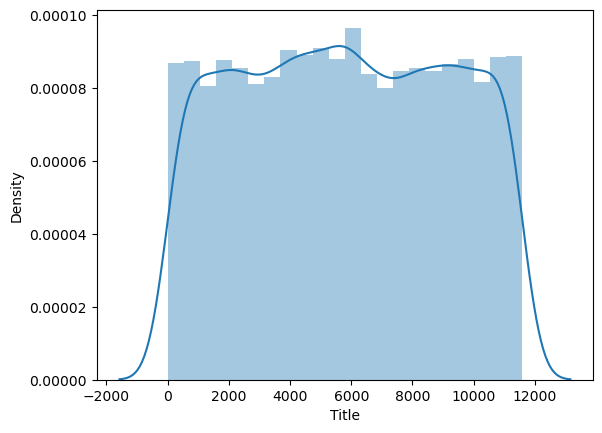

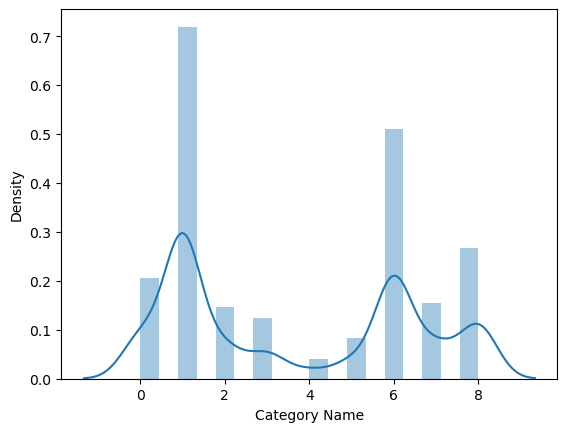

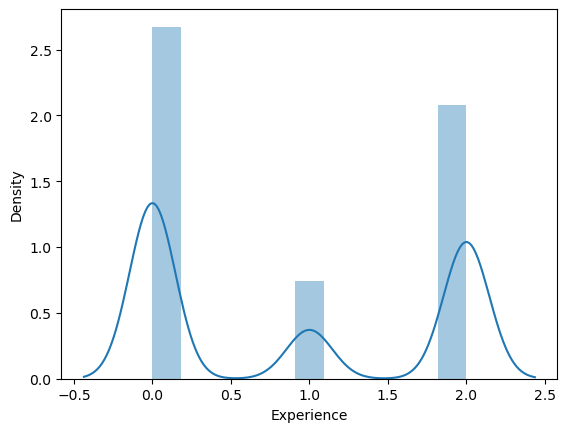

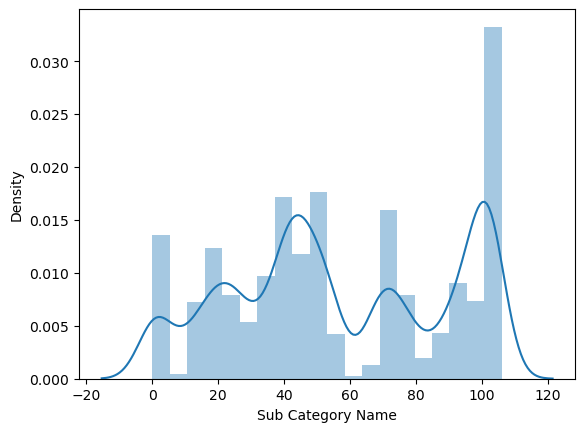

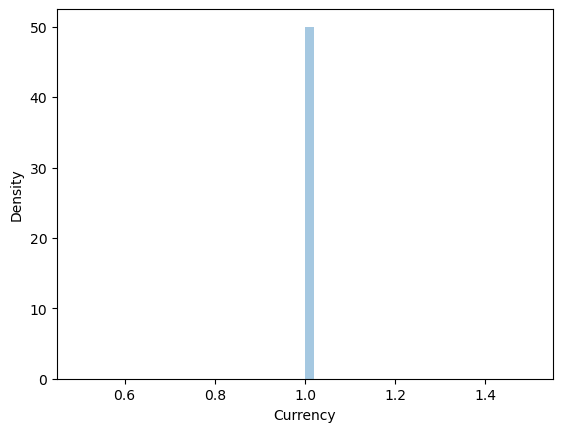

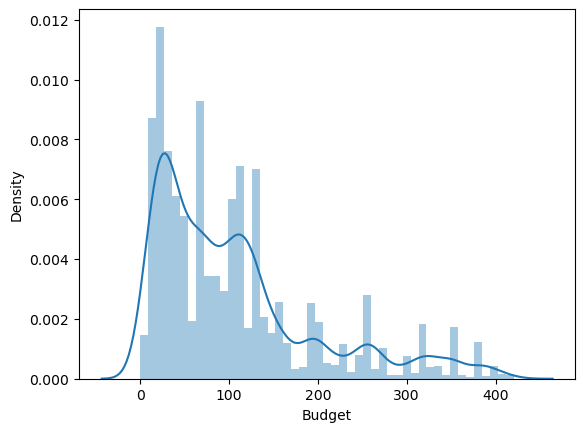

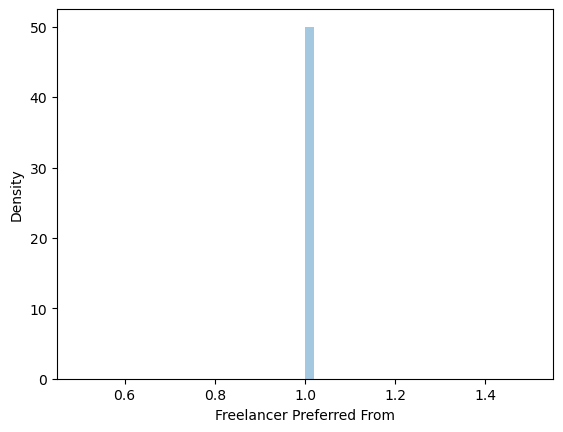

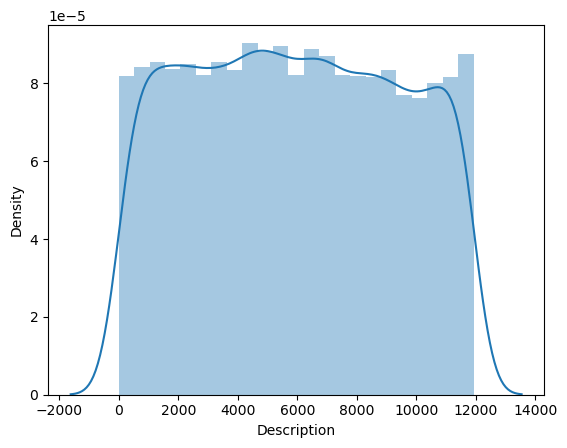

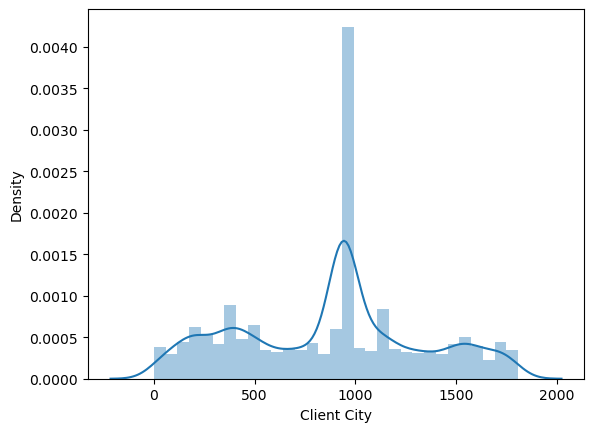

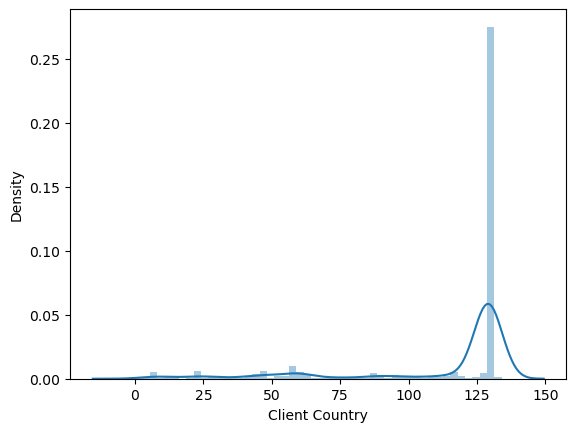

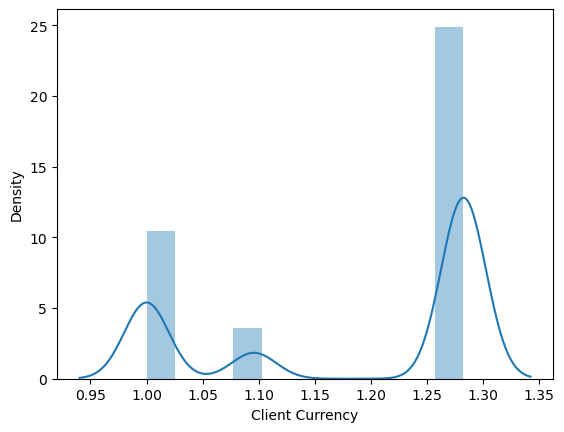

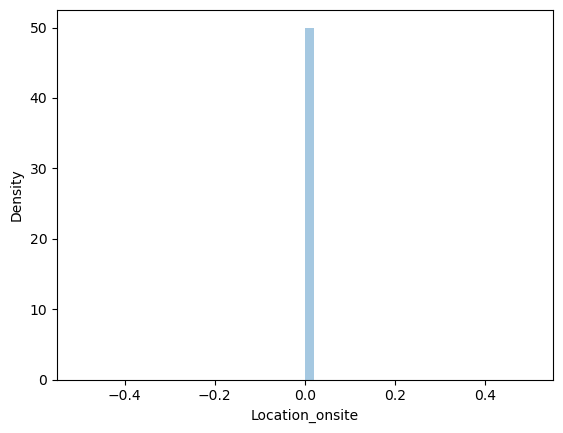

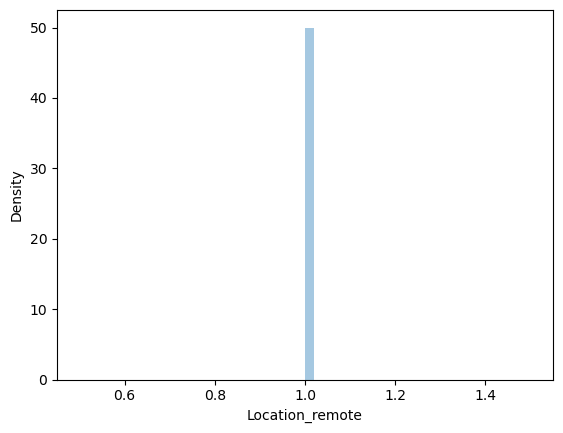

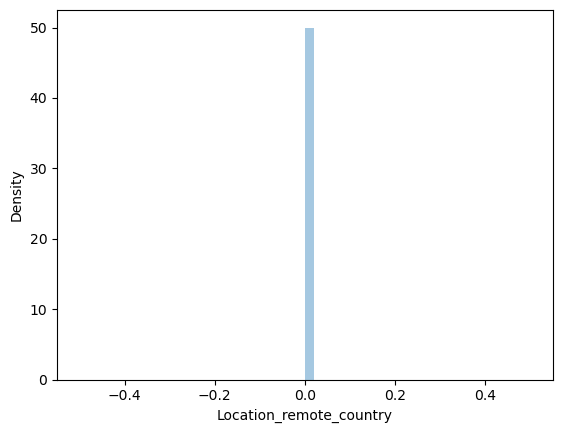

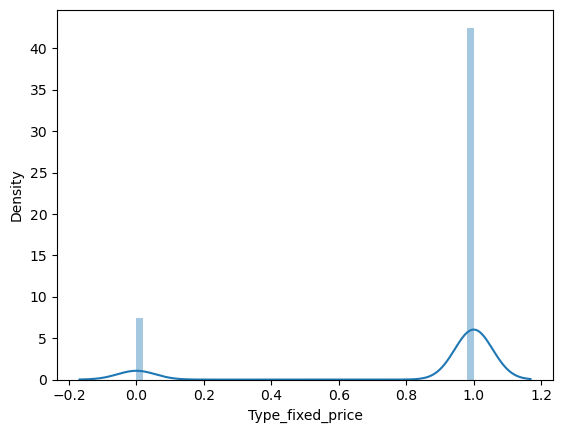

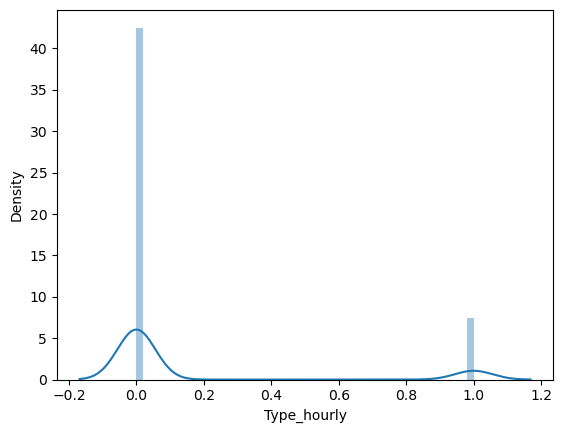

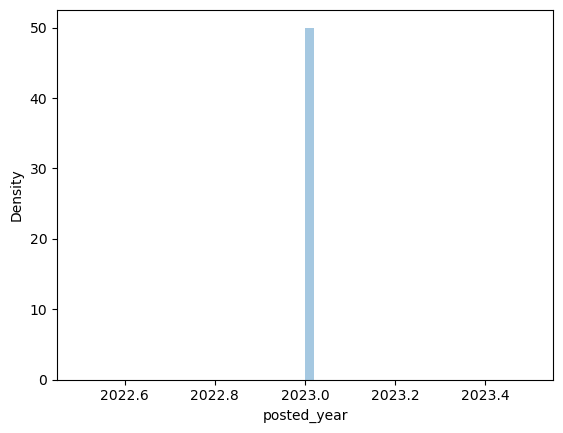

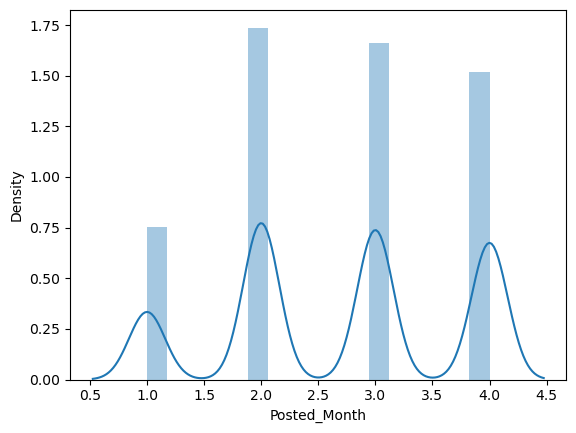

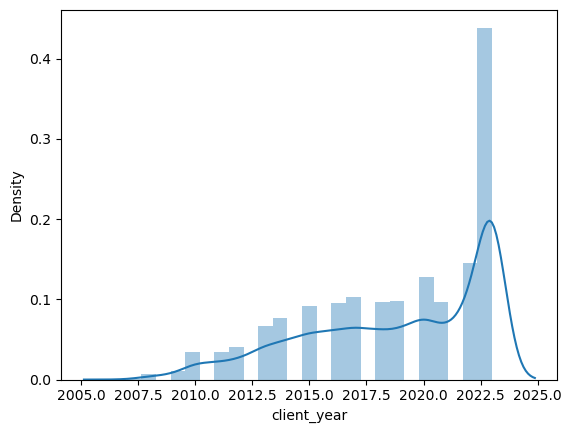

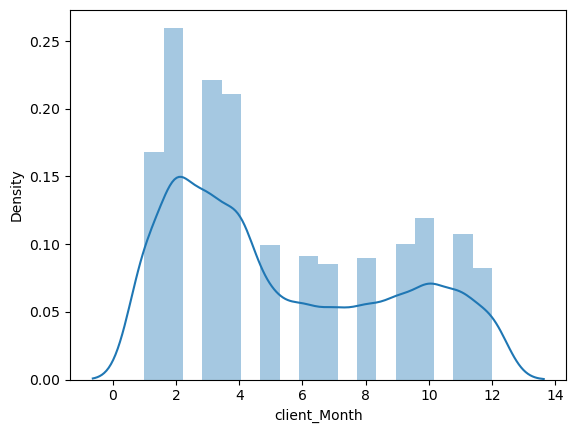

In [ ]:
for col in columns:
    print(col)
    print(skew(columns[col]))

    plt.figure()
    sns.distplot(columns[col])

In [ ]:
df=df[df['Client Country']>95]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
max_sc=MinMaxScaler()

In [ ]:
df.dtypes


Title                          int32
Category Name                  int32
Experience                     int64
Sub Category Name              int32
Currency                       int64
Budget                       float64
Freelancer Preferred From      int32
Description                    int32
Client City                    int32
Client Country                 int32
Client Currency              float64
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
Type_fixed_price               int32
Type_hourly                    int32
posted_year                    int32
Posted_Month                   int32
client_year                    int32
client_Month                   int32
dtype: object

In [ ]:
for col in df:
    max_sc=MinMaxScaler()
    df[col]=max_sc.fit_transform(df[[col]])

In [ ]:
x=df.drop(columns=['Budget'],axis=1)
y=df['Budget']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=4)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

xgb_model = xgb.XGBRegressor()

xgb_model.fit(xtrain, ytrain)

trainpred = xgb_model.predict(xtrain)
testpred = xgb_model.predict(xtest)

In [ ]:
mse_train = mean_squared_error(ytrain, trainpred)
mse_test = mean_squared_error(ytest, testpred)
r2_train = r2_score(ytrain, trainpred)
r2_test = r2_score(ytest, testpred)

print('M_s error for training data:', mse_train)
print('M_s for testing data:', mse_test)
print('R-squared for training data:', r2_train)
print('R-squared for testing data:', r2_test)

M_s error for training data: 0.005299005056839608
M_s for testing data: 0.016939362148276887
R-squared for training data: 0.8914208384560643
R-squared for testing data: 0.643982071864674


In [ ]:
df.dtypes

Title                        float64
Category Name                float64
Experience                   float64
Sub Category Name            float64
Currency                     float64
Budget                       float64
Freelancer Preferred From    float64
Description                  float64
Client City                  float64
Client Country               float64
Client Currency              float64
Location_onsite              float64
Location_remote              float64
Location_remote_country      float64
Type_fixed_price             float64
Type_hourly                  float64
posted_year                  float64
Posted_Month                 float64
client_year                  float64
client_Month                 float64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from IPython.display import display, Image

# Define the input data
input_data = (
    input('Enter Title of Project: '),
    input('Enter Category Name of Project: '),
    float(input('Enter Experience required for the Project(if(Entry=1),(Intermediat=2),(Expert=3),:')),
    input('Enter Sub-Category Name of Project: '),
    float(input('Enter Currency(usd =1): ')),
    input('From where the Freelancer Preferred From: '),
    input('Enter the description of project: '),
    input('Enter Client City: '),
    input('Enter Client Country: '),
    float(input('Currency')),
    float(input('If Location_onsite print(Yes=1, No=0): ')),
    float(input('If Location_remote print(Yes=1, No=0): ')),
    float(input('If Location_remote_Country print(Yes=1, No=0): ')),
    float(input('If budget Fixed_price(Yes=1, No=0): ')),
    float(input('If Budget is Hourly Price(Yes=1, No=0): ')),
    float(input('posted_year: ')),
    float(input('Posted_Month: ')),
    float(input('Client Registration year: ')),
    float(input('Client Registration Month: '))
)


# Perform label encoding on string data
label_encoder = LabelEncoder()
input_data_encoded = list(input_data)
input_data_encoded[0] = label_encoder.fit_transform([input_data[0]])[0]
input_data_encoded[1] = label_encoder.fit_transform([input_data[1]])[0]
input_data_encoded[3] = label_encoder.fit_transform([input_data[3]])[0]
input_data_encoded[5] = label_encoder.fit_transform([input_data[5]])[0]
input_data_encoded[6] = label_encoder.fit_transform([input_data[6]])[0]
input_data_encoded[7] = label_encoder.fit_transform([input_data[7]])[0]
input_data_encoded[8] = label_encoder.fit_transform([input_data[8]])[0]

# Print the encoded input data
print(input_data_encoded)

# Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data_encoded)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Perform the prediction using the support_vector_model


prediction = xgb_model.predict(input_data_reshaped)
print("Budget of Given Project is:", prediction)

Enter Title of Project:  Make my picture a solid silhouette 
Enter Category Name of Project:  Video, Photo & Image
Enter Experience required for the Project(if(Entry=1),(Intermediat=2),(Expert=3),:1
Enter Sub-Category Name of Project: Image Editing
Enter Currency(usd =1): 1
From where the Freelancer Preferred From: all
Enter the description of project: Hello
Enter Client City: London
Enter Client Country: UK
Currency1
If Location_onsite print(Yes=1, No=0): 1
If Location_remote print(Yes=1, No=0): 0
If Location_remote_Country print(Yes=1, No=0): 0
If budget Fixed_price(Yes=1, No=0): 1
If Budget is Hourly Price(Yes=1, No=0): 0
posted_year: 2023
Posted_Month: 2
Client Registration year: 2014
Client Registration Month: 12
[0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 2023.0, 2.0, 2014.0, 12.0]
Budget of Given Project is: [0.6594196]
